In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport model.dntm.MemoryReadingsStats

In [3]:
import torch
import seaborn as sns

from model.dntm.MemoryReadingsStats import MemoryReadingsStats

In [4]:
! ls ../data/interim/

memory_readings		       memory_readings_007_epoch2.pt
memory_readings_001_epoch0.pt  memory_readings_007_epoch3.pt
memory_readings_001_epoch1.pt  memory_readings_007_epoch4.pt
memory_readings_001_epoch2.pt  memory_readings_007_epoch5.pt
memory_readings_001_epoch3.pt  memory_readings_007_epoch6.pt
memory_readings_001_epoch4.pt  memory_readings_007_epoch7.pt
memory_readings_001_epoch5.pt  memory_readings_007_epoch8.pt
memory_readings_001_epoch6.pt  memory_readings_007_epoch9.pt
memory_readings_001_epoch7.pt  memory_readings_008_epoch0.pt
memory_readings_001_epoch8.pt  memory_readings_008_epoch1.pt
memory_readings_001_epoch9.pt  memory_readings_008_epoch2.pt
memory_readings_002_epoch0.pt  memory_readings_008_epoch3.pt
memory_readings_002_epoch1.pt  memory_readings_008_epoch4.pt
memory_readings_002_epoch2.pt  memory_readings_008_epoch5.pt
memory_readings_002_epoch3.pt  memory_readings_008_epoch6.pt
memory_readings_002_epoch4.pt  memory_readings_008_epoch7.pt
memory_readings_002_epoch5.pt  

In [5]:
memory_readings_stats = MemoryReadingsStats(path='../data/interim')

In [6]:
memory_size = 8 + 8
batch_size = 4
num_readings = 10

In [12]:
memory_readings_stats.memory_readings

In [14]:
memory_readings_stats.update_memory_readings(torch.rand(batch_size, memory_size), epoch=1)

In [7]:
for epoch in range(10):
    for _ in range(num_readings):
        memory_readings_stats.update_memory_readings(torch.rand(batch_size, memory_size), epoch)

In [7]:
memory_readings_stats.load_memory_readings(epoch=2)

In [8]:
memory_readings_stats.compute_readings_variance()

tensor([0.0816, 0.0827, 0.0967, 0.0764, 0.0846, 0.0813, 0.0899, 0.0890, 0.0744,
        0.0839, 0.0928, 0.0928, 0.0783, 0.0757, 0.0798, 0.0814])

In [9]:
memory_readings_stats.init_random_matrix(memory_size)

In [10]:
torch.linalg.norm(memory_readings_stats.random_matrix[0])

tensor(1.)

In [11]:
memory_readings_stats.compute_random_projections()

tensor([[4.4385, 4.5874],
        [3.3225, 3.6644],
        [3.5091, 4.2308],
        [4.2081, 4.3556],
        [4.3186, 4.2710],
        [4.0856, 4.9512],
        [5.2822, 5.4530],
        [5.3542, 4.9603],
        [4.4926, 2.3904],
        [4.9991, 5.6896],
        [4.7357, 3.9679],
        [4.7526, 4.7711],
        [3.9562, 3.7841],
        [4.9681, 5.4818],
        [4.5942, 4.6559],
        [4.0355, 4.0443],
        [4.6720, 4.2133],
        [3.6138, 5.1342],
        [5.9182, 5.7910],
        [4.6541, 4.3165],
        [6.6103, 6.9122],
        [4.9203, 5.4923],
        [4.5746, 4.8631],
        [5.7482, 4.5732],
        [4.4035, 4.0381],
        [4.5268, 4.5875],
        [5.6504, 5.1960],
        [5.3816, 4.7476],
        [3.6191, 4.3081],
        [4.4322, 5.2225],
        [6.2262, 5.1685],
        [4.6480, 5.8616],
        [6.0630, 5.3072],
        [5.4300, 5.1476],
        [5.0736, 4.8535],
        [5.0251, 5.1605],
        [5.1662, 4.4173],
        [5.4332, 5.8462],
        [3.1

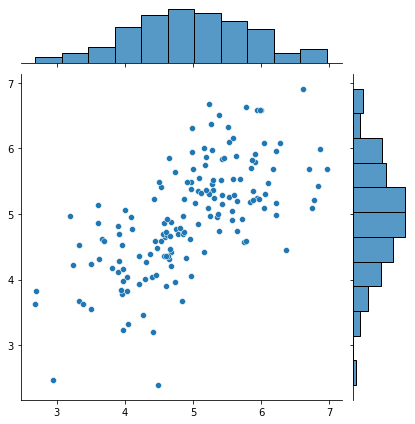

In [12]:
_ = sns.jointplot(x=memory_readings_stats.random_projections[:, 0],
                  y=memory_readings_stats.random_projections[:, 1])

In [13]:
memory_readings_stats.memory_readings.max()

tensor(0.9997)

In [14]:
memory_readings_stats.compute_readings_kl_divergence()

tensor([[-0.4091, -0.7069, -0.4471,  ..., -0.4827, -0.0530, -0.5771],
        [-0.7877, -0.2423, -0.6146,  ..., -0.5581, -0.2435, -0.1692],
        [-0.3745, -0.4974, -0.4045,  ..., -0.7079, -0.4415, -0.6800],
        ...,
        [-0.6914, -0.0984, -0.2450,  ..., -0.5006, -0.8293, -0.3988],
        [-0.3248, -0.3421, -0.3162,  ..., -0.8427, -0.2517, -0.5758],
        [-0.2531, -0.1253, -0.4684,  ..., -0.7932, -0.4085, -0.7294]])

In [15]:
print(memory_readings_stats)

Readings variance: tensor([0.0816, 0.0827, 0.0967, 0.0764, 0.0846, 0.0813, 0.0899, 0.0890, 0.0744,
        0.0839, 0.0928, 0.0928, 0.0783, 0.0757, 0.0798, 0.0814])
Readings KL divergence from uniform distribution: tensor([[-0.4091, -0.7069, -0.4471,  ..., -0.4827, -0.0530, -0.5771],
        [-0.7877, -0.2423, -0.6146,  ..., -0.5581, -0.2435, -0.1692],
        [-0.3745, -0.4974, -0.4045,  ..., -0.7079, -0.4415, -0.6800],
        ...,
        [-0.6914, -0.0984, -0.2450,  ..., -0.5006, -0.8293, -0.3988],
        [-0.3248, -0.3421, -0.3162,  ..., -0.8427, -0.2517, -0.5758],
        [-0.2531, -0.1253, -0.4684,  ..., -0.7932, -0.4085, -0.7294]])



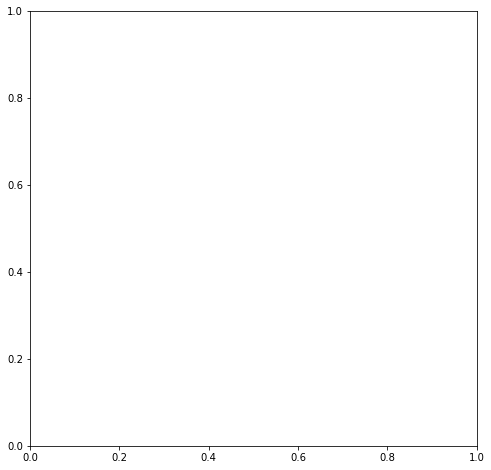

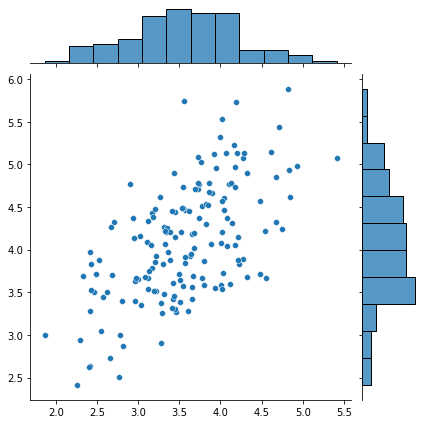

In [15]:
memory_readings_stats.plot_random_projections()